In [1]:
import cv2

In [2]:
img=cv2.imread("grp image.jpeg")
img

array([[[ 58,  84, 121],
        [ 83, 109, 146],
        [ 68,  93, 133],
        ...,
        [ 29,  63,  63],
        [ 49,  85,  85],
        [ 18,  54,  54]],

       [[  1,  27,  67],
        [  0,  20,  60],
        [  6,  31,  73],
        ...,
        [ 61,  95,  94],
        [ 38,  72,  72],
        [ 24,  61,  59]],

       [[ 67,  96, 141],
        [ 64,  93, 138],
        [ 82, 110, 157],
        ...,
        [ 30,  65,  61],
        [ 89, 123, 122],
        [  0,  34,  30]],

       ...,

       [[171, 202, 201],
        [169, 197, 208],
        [184, 203, 241],
        ...,
        [103, 113,  71],
        [ 97, 107,  65],
        [ 92, 102,  59]],

       [[172, 203, 200],
        [169, 197, 208],
        [187, 206, 244],
        ...,
        [ 66,  75,  35],
        [ 67,  76,  36],
        [ 68,  78,  36]],

       [[179, 210, 207],
        [177, 206, 215],
        [195, 214, 252],
        ...,
        [ 33,  41,   4],
        [ 45,  54,  14],
        [ 57,  66,  26]]

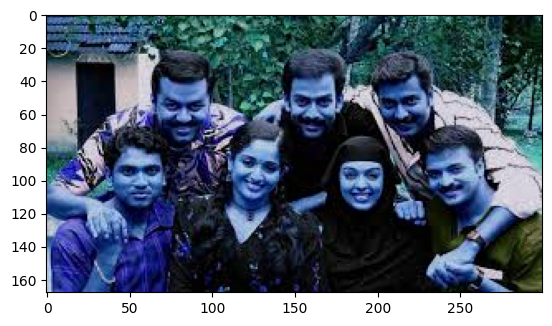

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)

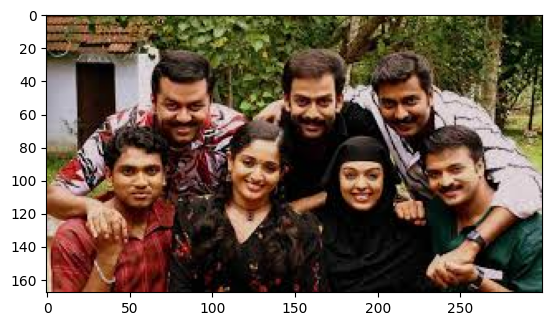

In [4]:
conv_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(conv_img)

In [5]:
face_cas=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cas

< cv2.CascadeClassifier 00000163C3FFFE50>

In [6]:
faces=face_cas.detectMultiScale(img,minNeighbors=1)   # the times the point considered as face, i.e, if minNeighbors increases,no of faces detected decreases
faces

array([[173,  83,  34,  34],
       [141,  38,  38,  38],
       [196,  41,  35,  35],
       [109,  76,  39,  39],
       [ 36,  79,  41,  41],
       [ 62,  38,  43,  43],
       [224,  82,  36,  36]], dtype=int32)

In [7]:
# img_gray=cv2.cvtColor(conv_img,cv2.COLOR_RGB2GRAY)  another way of prprocessing to identify the faces

In [8]:
for (x,y,w,h) in faces:
    cv2.rectangle(conv_img,(x,y),(x+w,y+h),(255,0,0),1)

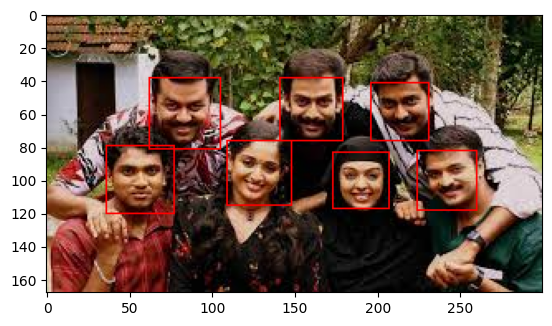

In [9]:
plt.imshow(conv_img)

In [10]:
video=cv2.VideoCapture(0)
while True:
    success,img=video.read()
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cas.detectMultiScale(gray_img,minNeighbors=4)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.imshow("Video",img)
    if cv2.waitKey(1) & 0XFF==ord('w'):
        break
video.release()
cv2.destroyAllWindows()


In [11]:
video=cv2.VideoCapture('video.mp4')
while True:
    success,img=video.read()
    if success:
        gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cas.detectMultiScale(gray_img,minNeighbors=1)
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.imshow("Video",img)
        if cv2.waitKey(1) & 0XFF==ord('w'):
            break
    else:
        print("Video Over")
        break
video.release()
cv2.destroyAllWindows()

Video Over
